In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of 1500 random latitude and longitude combinations

lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
print(len(cities))

635


In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | tunduru
City not found. Skipping...
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | narsaq
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | krasnoselkup
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | camacha
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | warmbad
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | cooma
Processing Record 18 of Set 1 | khandagayty
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | domoni
Processing Record 22 of Set 1 | arraial do cabo
Processing Record 2

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,80.89,69,75,10.36,MU,2023-01-11 15:42:09
1,Kapaa,22.0752,-159.3190,69.10,87,20,3.44,US,2023-01-11 15:42:10
2,Cape Town,-33.9258,18.4232,75.88,60,95,8.99,ZA,2023-01-11 15:37:24
3,Hasaki,35.7333,140.8333,27.00,48,3,5.08,JP,2023-01-11 15:42:11
4,Rikitea,-23.1203,-134.9692,77.97,76,100,16.46,PF,2023-01-11 15:42:11
5,Narsaq,60.9167,-46.0500,21.42,72,100,6.15,GL,2023-01-11 15:42:11
6,Castro,-24.7911,-50.0119,72.50,81,100,6.60,BR,2023-01-11 15:42:12
7,Tuktoyaktuk,69.4541,-133.0374,-13.00,84,75,10.36,CA,2023-01-11 15:42:12
8,Krasnoselkup,65.7000,82.4667,-42.00,100,49,5.61,RU,2023-01-11 15:42:12
9,Kodiak,57.7900,-152.4072,29.71,86,100,5.75,US,2023-01-11 15:42:13


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2023-01-11 15:42:09,-20.4081,57.7000,80.89,69,75,10.36
1,Kapaa,US,2023-01-11 15:42:10,22.0752,-159.3190,69.10,87,20,3.44
2,Cape Town,ZA,2023-01-11 15:37:24,-33.9258,18.4232,75.88,60,95,8.99
3,Hasaki,JP,2023-01-11 15:42:11,35.7333,140.8333,27.00,48,3,5.08
4,Rikitea,PF,2023-01-11 15:42:11,-23.1203,-134.9692,77.97,76,100,16.46
5,Narsaq,GL,2023-01-11 15:42:11,60.9167,-46.0500,21.42,72,100,6.15
6,Castro,BR,2023-01-11 15:42:12,-24.7911,-50.0119,72.50,81,100,6.60
7,Tuktoyaktuk,CA,2023-01-11 15:42:12,69.4541,-133.0374,-13.00,84,75,10.36
8,Krasnoselkup,RU,2023-01-11 15:42:12,65.7000,82.4667,-42.00,100,49,5.61
9,Kodiak,US,2023-01-11 15:42:13,57.7900,-152.4072,29.71,86,100,5.75


In [12]:
# Create the output file (CSV)
import os

In [13]:
output_data_file = os.path.join('weather_data', 'cities.csv')

# Export the city_data_df into a CSV.
city_data_df.to_csv(output_data_file)

In [14]:
file_to_load = os.path.join('weather_data', 'cities.csv')

city_data_df = pd.read_csv(file_to_load)
city_data_df.drop(columns=["Unnamed: 0"])

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2023-01-11 15:42:09,-20.4081,57.7000,80.89,69,75,10.36
1,Kapaa,US,2023-01-11 15:42:10,22.0752,-159.3190,69.10,87,20,3.44
2,Cape Town,ZA,2023-01-11 15:37:24,-33.9258,18.4232,75.88,60,95,8.99
3,Hasaki,JP,2023-01-11 15:42:11,35.7333,140.8333,27.00,48,3,5.08
4,Rikitea,PF,2023-01-11 15:42:11,-23.1203,-134.9692,77.97,76,100,16.46
...,...,...,...,...,...,...,...,...,...
575,Ierapetra,GR,2023-01-11 15:57:36,35.0100,25.7353,57.54,67,61,7.76
576,Dire Dawa,ET,2023-01-11 15:57:36,9.5931,41.8661,73.44,37,10,9.64
577,Millinocket,US,2023-01-11 15:57:36,45.6573,-68.7098,21.78,61,11,0.96
578,Payo,ID,2023-01-11 15:57:37,-3.7508,103.6372,72.54,98,100,2.53


In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

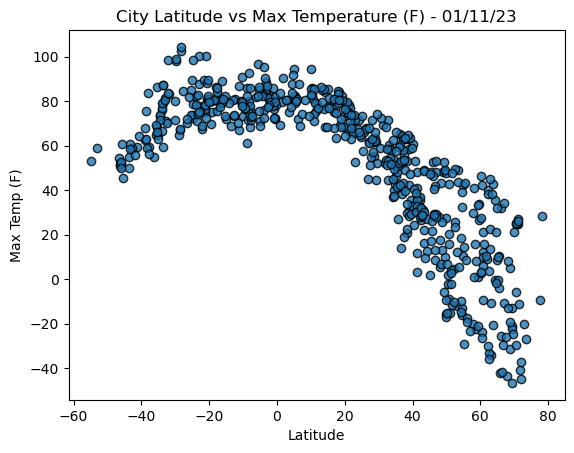

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats, max_temps,
    edgecolors= "black", linewidths= 1,
    alpha= 0.8, label="Cities"
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature (F) - {time.strftime('%x')}")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
# Save the figure.
plt.savefig(os.path.join('weather_data', 'Fig1.png'))

# Show plot.
plt.show()

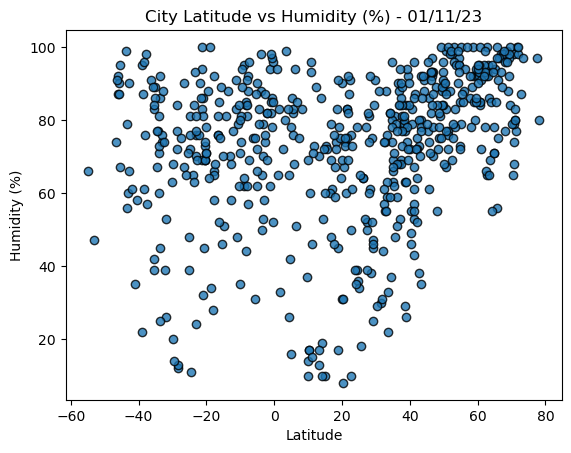

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats, humidity,
    edgecolors= "black", linewidths= 1,
    alpha= 0.8, label="Cities"
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity (%) - {time.strftime('%x')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
# Save the figure.
plt.savefig(os.path.join('weather_data', 'Fig2.png'))

# Show plot.
plt.show()

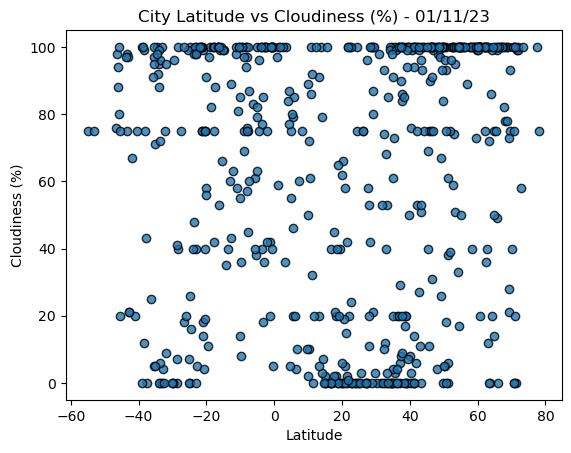

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats, cloudiness,
    edgecolors= "black", linewidths= 1,
    alpha= 0.8, label="Cities"
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness (%) - {time.strftime('%x')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
# Save the figure.
plt.savefig(os.path.join('weather_data', 'Fig3.png'))

# Show plot.
plt.show()

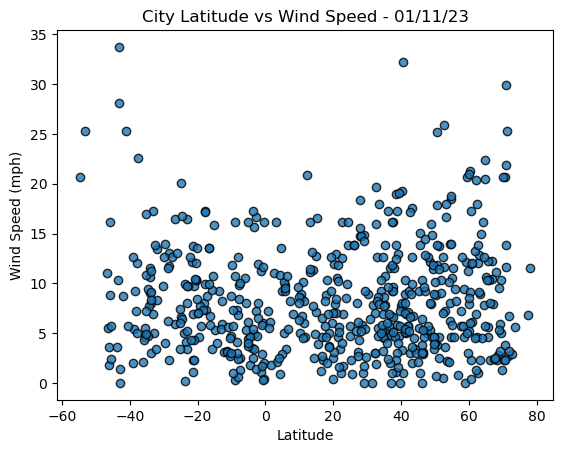

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats, wind_speed,
    edgecolors= "black", linewidths= 1,
    alpha= 0.8, label="Cities"
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed - {time.strftime('%x')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
# Save the figure.
plt.savefig(os.path.join('weather_data', 'Fig4.png'))

# Show plot.
plt.show()

In [20]:
city_data_df.describe()

,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,289.500000,19.953643,12.942938,50.705776,72.968966,61.568966,8.245534
std,167.575853,33.516022,91.114201,33.495307,20.628695,39.621574,5.484434
min,0.000000,-54.800000,-175.200000,-46.610000,8.000000,0.000000,0.000000
25%,144.750000,-8.467250,-68.621000,29.557500,64.000000,20.000000,4.492500
50%,289.500000,26.154450,17.483050,61.465000,77.000000,75.000000,7.160000
75%,434.250000,47.152325,93.337500,77.350000,88.000000,100.000000,11.420000
max,579.000000,78.218600,179.316700,104.380000,100.000000,100.000000,33.730000


In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, print_details= False):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = f'y= {round(slope, 2)}x + {round(intercept, 2)}'

    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")

    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add labels
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

    if print_details:
        print(
            f'Slope: {round(slope, 2)}\n'
            f'Intercept {round(intercept, 2)}\n'
            f'R Value: {round(r_value, 2)}\n'
            f'P Value = {round(p_value, 2)}\n'
            f'Standard Error: {round(std_err, 2)}'
        )

In [25]:
# Separate data into northern hemisphere and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

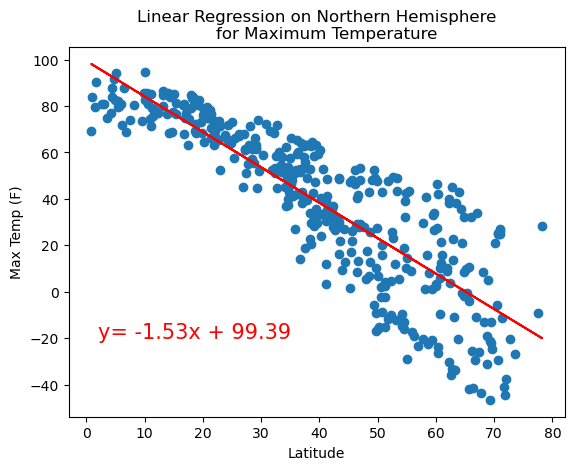

Slope: -1.53
Intercept 99.39
R Value: -0.85
P Value = 0.0
Standard Error: 0.05


In [48]:
# Linear regression for the Northern Hemisphere for Maximum Temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the Linear Regression function

plot_linear_regression(
    x_values, y_values, 
    "Linear Regression on Northern Hemisphere\n\
    for Maximum Temperature",
    "Max Temp (F)",
    (2,-20),
    print_details= True
)

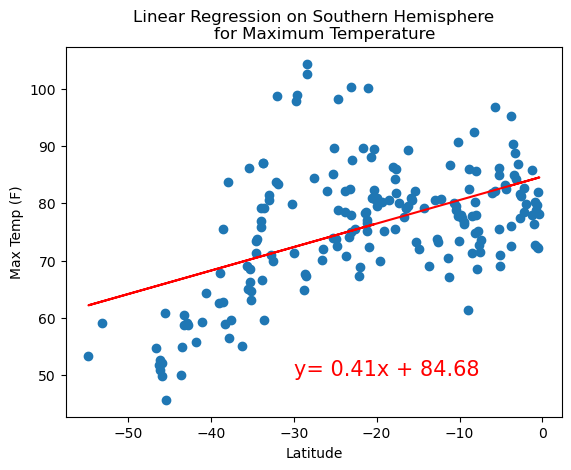

Slope: 0.41
Intercept 84.68
R Value: 0.51
P Value = 0.0
Standard Error: 0.05


In [52]:
# Linear regression for the Southern Hemisphere for Maximum Temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the Linear Regression function

plot_linear_regression(
    x_values, y_values, 
    "Linear Regression on Southern Hemisphere\n\
    for Maximum Temperature",
    "Max Temp (F)",
    (-30,50), print_details=True
)

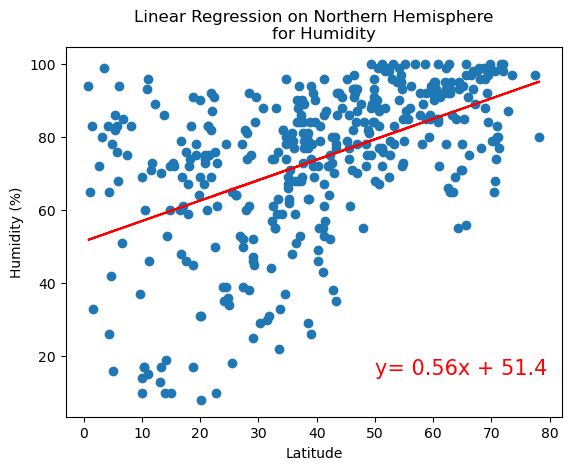

Slope: 0.56
Intercept 51.4
R Value: 0.5
P Value = 0.0
Standard Error: 0.05


In [50]:
# Linear regression for the Northern Hemisphere for Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the Linear Regression function

plot_linear_regression(
    x_values, y_values, 
    "Linear Regression on Northern Hemisphere\n\
    for Humidity",
    "Humidity (%)",
    (50,15), print_details=True
)

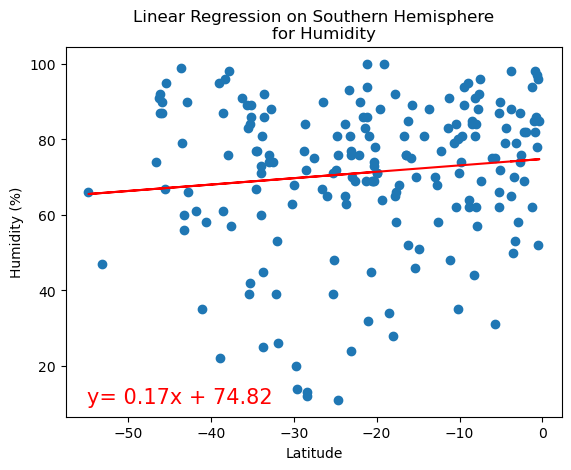

Slope: 0.17
Intercept 74.82
R Value: 0.12
P Value = 0.1
Standard Error: 0.1


In [51]:
# Linear regression for the Southern Hemisphere for Humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the Linear Regression function

plot_linear_regression(
    x_values, y_values, 
    "Linear Regression on Southern Hemisphere\n\
    for Humidity",
    "Humidity (%)",
    (-55, 10), print_details=True
)

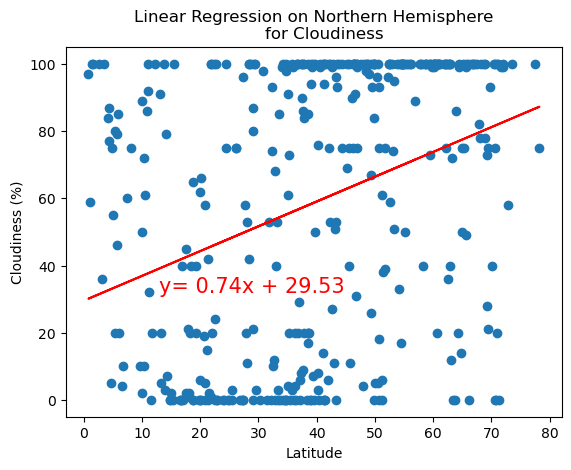

Slope: 0.74
Intercept 29.53
R Value: 0.34
P Value = 0.0
Standard Error: 0.1


In [58]:
# Linear regression for the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the Linear Regression function

plot_linear_regression(
    x_values, y_values, 
    "Linear Regression on Northern Hemisphere\n\
    for Cloudiness",
    "Cloudiness (%)",
    (13, 32), print_details=True
)

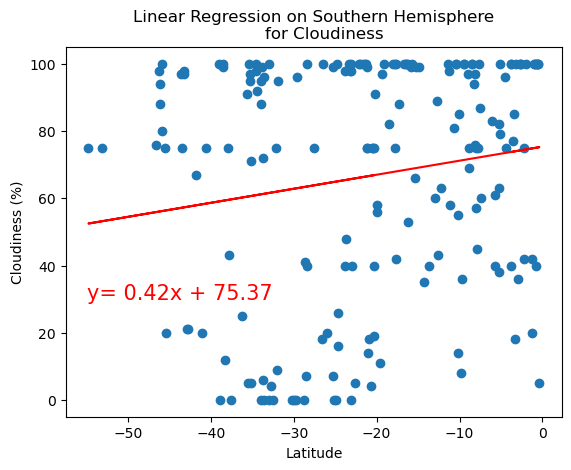

Slope: 0.42
Intercept 75.37
R Value: 0.16
P Value = 0.03
Standard Error: 0.19


In [57]:
# Linear regression for the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the Linear Regression function

plot_linear_regression(
    x_values, y_values, 
    "Linear Regression on Southern Hemisphere\n\
    for Cloudiness",
    "Cloudiness (%)",
    (-55, 30), print_details=True
)

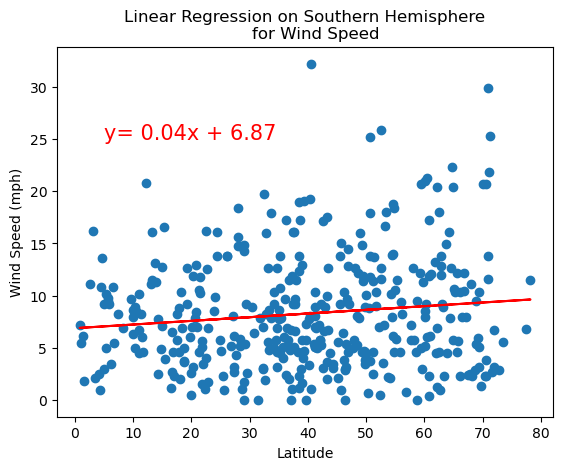

Slope: 0.04
Intercept 6.87
R Value: 0.12
P Value = 0.02
Standard Error: 0.01


In [63]:
# Linear regression for the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the Linear Regression function

plot_linear_regression(
    x_values, y_values, 
    "Linear Regression on Southern Hemisphere\n\
    for Wind Speed",
    "Wind Speed (mph)",
    (5, 25), print_details=True
)

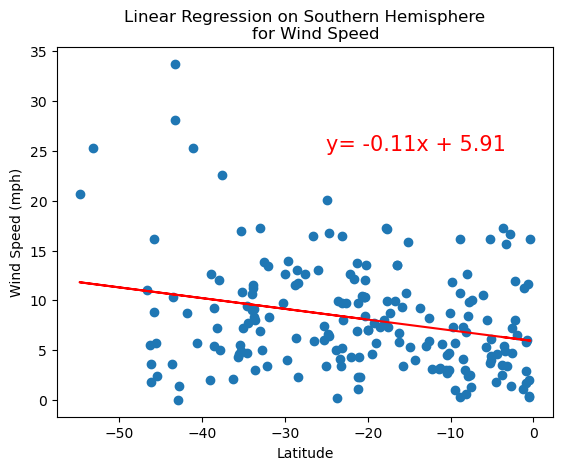

Slope: -0.11
Intercept 5.91
R Value: -0.27
P Value = 0.0
Standard Error: 0.03


In [65]:
# Linear regression for the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the Linear Regression function

plot_linear_regression(
    x_values, y_values, 
    "Linear Regression on Southern Hemisphere\n\
    for Wind Speed",
    "Wind Speed (mph)",
    (-25, 25), print_details=True
)